In [52]:
import pandas as pd
"""
Right now we are downloading data from 
https://fragilestatesindex.org/
Then processing it for move up to red
We need to automate this process for use in our new green to red pipeline(WIP)
On a monthly basis we need to do a data pull and get any new data
If we put it in a dash app we can use POSIT CONNECT to keep the script persisting
"""
df = pd.read_excel("Rankings.xlsx")

cols = []
for col in df.columns:
    if "Unnamed" in col:
        cols.append(df[col].iloc[0])
    else:
        cols.append(col)
        
df.columns = cols
df = df[1:]

df = df[["Country", "Total"]]
df.columns = ["Country", "FSI Total"]

df["FSI Total Normalized"] = df["FSI Total"].apply(lambda x: (x-min(df["FSI Total"]))/(max(df["FSI Total"])-min(df["FSI Total"])))
df["FSI Total Normalized x4"] = df["FSI Total Normalized"]*4

In [53]:
df

,Country,FSI Total,FSI Total Normalized,FSI Total Normalized x4
1,Somalia,111.3,1.000000,4.000000
2,Sudan,109.3,0.979716,3.918864
3,South Sudan,109.0,0.976673,3.906694
4,Syria,108.1,0.967546,3.870183
5,Congo Democratic Republic,106.7,0.953347,3.813387
...,...,...,...,...
175,Denmark,15.9,0.032454,0.129817
176,New Zealand,15.9,0.032454,0.129817
177,Iceland,15.2,0.025355,0.101420
178,Finland,14.3,0.016227,0.064909


In [54]:
df.to_excel("FSI_output.xlsx")

In [55]:
import dash
from dash import Dash, dcc, html
import matplotlib.pyplot as plt
import plotly.express as px

In [56]:
column_names = df.columns
print("Column names", column_names.tolist())

Column names ['Country', 'FSI Total', 'FSI Total Normalized', 'FSI Total Normalized x4']


In [57]:
fig = px.bar(
    df,
    x="FSI Total",
    y="Country",
    orientation="h",
    title="Fragile State Index per Country",
    labels={"FSI Total": "FSI Total Score", "Country": "Countries"},
)


In [58]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Green to Red Pipeline - Fragile State Index"),
    dcc.Graph(figure=fig),
])

In [59]:
if __name__== "__main__":
    app.run_server(debug=True)

In [60]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

# Path to your ChromeDriver
# Set up the Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Optional: run in headless mode
driver = webdriver.Chrome(options=options)

url = "https://fragilestatesindex.org/excel/"
driver.get(url)

# Wait for the page to load (adjust time if necessary)
driver.implicitly_wait(10)

# Extract links
links = set()
for link in driver.find_elements(By.TAG_NAME, "a"):
    href = link.get_attribute("href")
    if href and (".xlsx" in href or ".xls" in href):
        links.add(href)

print("Excel Links Found:", links)

driver.quit()

Excel Links Found: {'https://fragilestatesindex.org/wp-content/uploads/2019/04/fsi-2019.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/2018/04/fsi-2018.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2009.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2017.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2006.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2014.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2012.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/2020/05/fsi-2020.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2016.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/2023/06/FSI-2023-DOWNLOAD.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2011.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2015.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/2022/07/fsi-2022-download.xlsx', 'https://fr

In [61]:
from bs4 import BeautifulSoup
import requests

url = "https://fragilestatesindex.org/excel" 
request_headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

page = requests.get(url, headers=request_headers)

soup = BeautifulSoup(page.text, 'html')

print(soup)

<!DOCTYPE html>

<html lang="en-US" xml:lang="en-US">
<head>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<title>Download Data in Excel Format | Fragile States Index</title> <meta content="max-image-preview:large" name="robots"/>
<link href="//maps.google.com" rel="dns-prefetch"/>
<link href="//ws.sharethis.com" rel="dns-prefetch"/>
<link href="https://fragilestatesindex.org/feed/" rel="alternate" title="Fragile States Index » Feed" type="application/rss+xml"/>
<link href="https://fragilestatesindex.org/comments/feed/" rel="alternate" title="Fragile States Index » Comments Feed" type="application/rss+xml"/>
<!-- This site uses the Google Analytics by MonsterInsights plugin v9.2.3 - Using Analytics tracking - https://www.monsterinsights.com/ -->
<!-- Note: MonsterInsights is not currently configured on this site. The site owner needs to authenticate with Google Analytics in the MonsterInsights

In [62]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# Set up the Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Optional: run in headless mode
driver = webdriver.Chrome(options=options)

# Access the website
driver.get("https://fragilestatesindex.org/excel")

# Extract data
links = driver.find_elements(By.XPATH, "//a[contains(@href, 'https://fragilestatesindex.org/wp-content/uploads/')]")
links_set = set()

for link in links:
    links_set.add(link.get_attribute("href"))

print(links_set)
driver.quit()

{'https://fragilestatesindex.org/wp-content/uploads/2019/04/fsi-2019.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/2018/04/fsi-2018.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2009.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2017.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2006.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2014.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2012.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/2020/05/fsi-2020.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2016.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/2023/06/FSI-2023-DOWNLOAD.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2011.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/data/fsi-2015.xlsx', 'https://fragilestatesindex.org/wp-content/uploads/2022/07/fsi-2022-download.xlsx', 'https://fragilestatesindex.or

In [78]:
from io import BytesIO

combined_df = pd.DataFrame()

# Define headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

columns_to_keep = ["Country", "Year", "Total"]

# Loop through each link, download the file, and read it
for link in links_set:
    try:
        # Send GET request with headers
        response = requests.get(link, headers=headers)
        response.raise_for_status()  # Raise an error for bad status codes
        
        # Read the Excel file into a DataFrame
        df = pd.read_excel(BytesIO(response.content), usecols=columns_to_keep)
        
        # Append the data to the combined DataFrame
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    except Exception as e:
        print(f"Failed to process {link}: {e}")

combined_df['Year'] = combined_df['Year'].astype(str).str[:4].astype(int)
output_file = "FSI_Combined.xlsx"
combined_df.to_excel(output_file, index=False)

# Display the combined DataFrame
print(combined_df)

                        Country  Year  Total
0                         Yemen  2019  113.5
1                       Somalia  2019  112.3
2                   South Sudan  2019  112.2
3                         Syria  2019  111.5
4     Congo Democratic Republic  2019  110.2
...                         ...   ...    ...
3165                    Ireland  2010   22.4
3166                Switzerland  2010   21.8
3167                     Sweden  2010   20.9
3168                    Finland  2010   19.3
3169                     Norway  2010   18.7

[3170 rows x 3 columns]


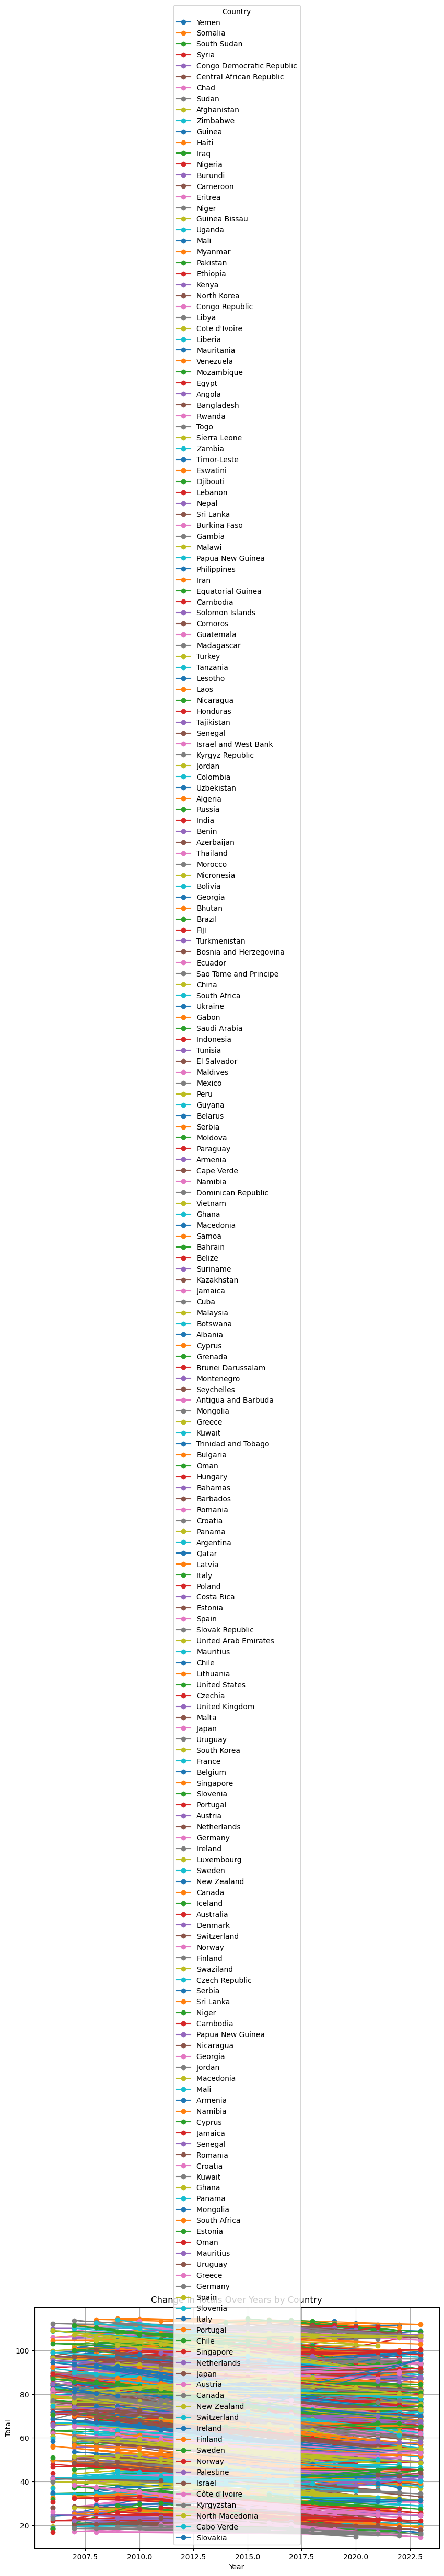

In [79]:
plt.figure(figsize=(10, 6))
for country in combined_df['Country'].unique():
    subset = combined_df[combined_df['Country'] == country]
    plt.plot(subset['Year'], subset['Total'], marker='o', label=country)

plt.title('Change in Totals Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend(title='Country')
plt.grid()
plt.show()